In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
titanic = sns.load_dataset('titanic')

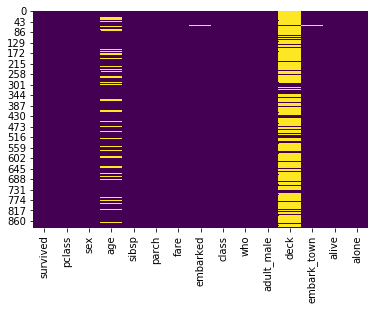

In [4]:
sns.heatmap(titanic.isnull(), cbar = False , cmap = 'viridis')

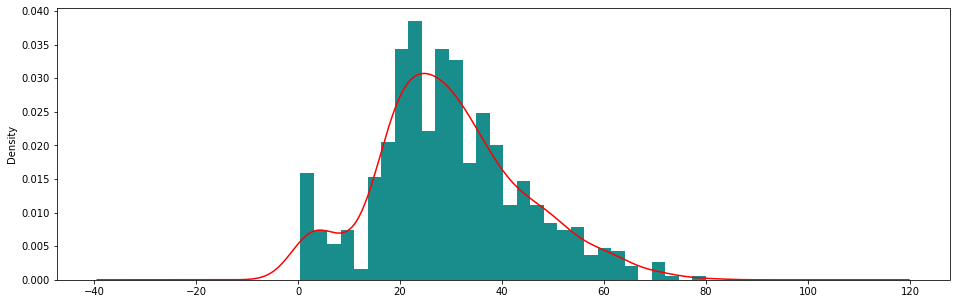

In [5]:
ax = titanic['age'].hist(bins = 30, density = True, stacked = True, color = 'teal', alpha = 0.9, figsize = (16,5))
titanic['age'].plot(kind = 'density', color = 'r')

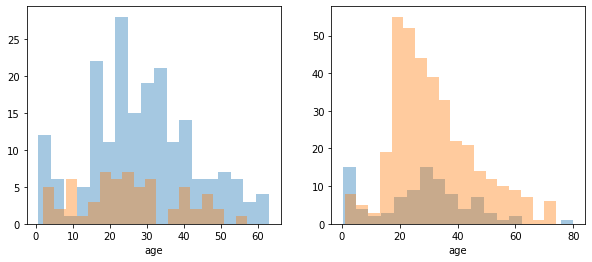

In [6]:
survived = 'survived'
not_survived = 'not survived'

fig , axes = plt.subplots(nrows= 1, ncols= 2 , figsize = (10,4))
women = titanic[titanic['sex'] == 'female']
men = titanic[titanic['sex'] == 'male']

ax = sns.distplot(women[women[survived] ==1].age.dropna(), bins = 18, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women[survived] ==0].age.dropna(), bins = 18, label = not_survived, ax = axes[0], kde = False)

ax = sns.distplot(men[men[survived] ==1].age.dropna(), bins = 18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men[survived] ==0].age.dropna(), bins = 18, label = not_survived, ax = axes[1], kde = False)

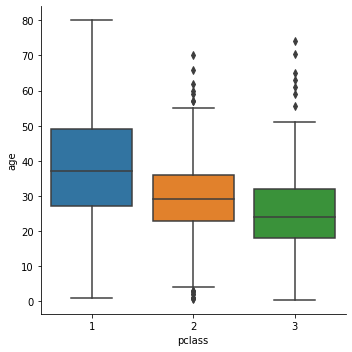

In [7]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'box')

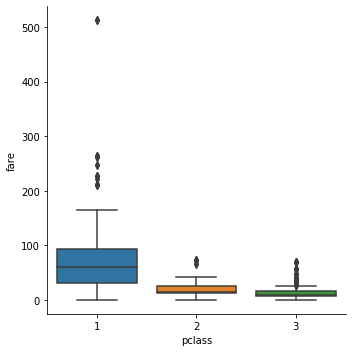

In [8]:
sns.catplot(x = 'pclass', y = 'fare', data = titanic, kind = 'box')

In [9]:
titanic[titanic['pclass'] == 1]['age'].mean()

38.233440860215055

In [10]:
titanic[titanic['pclass'] == 2]['age'].mean()

29.87763005780347

In [11]:
titanic[titanic['pclass'] == 3]['age'].mean()

25.14061971830986

In [12]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return titanic[titanic['pclass'] == 1]['age'].mean()
        elif pclass == 2:
            return titanic[titanic['pclass'] == 2]['age'].mean()
        elif pclass == 3:
            return titanic[titanic['pclass'] == 3]['age'].mean()
    else: 
        return age 
    

In [13]:
titanic['age'] = titanic[['age','pclass']].apply(impute_age, axis = 1)

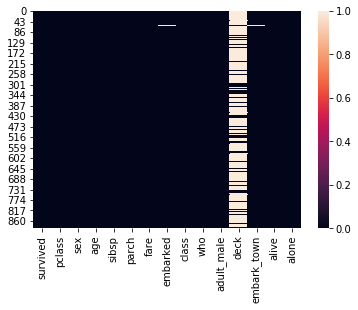

In [14]:
sns.heatmap(titanic.isnull())

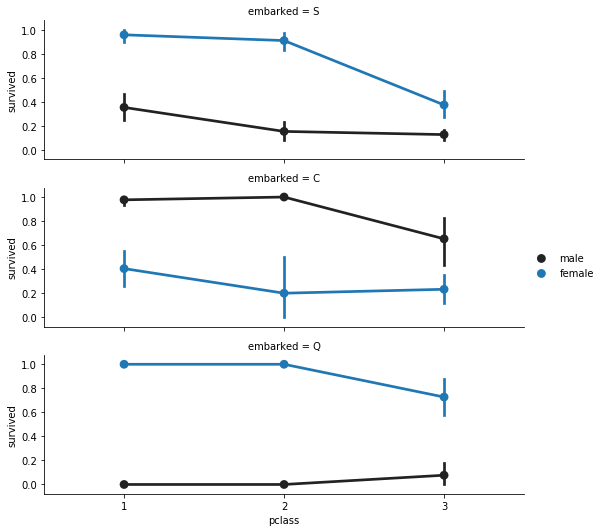

In [15]:
f = sns.FacetGrid(titanic, row = 'embarked', height= 2.5, aspect = 3)
f.map(sns.pointplot, 'pclass', 'survived', 'sex', order = None, hue_order = None)
f.add_legend()

In [16]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [17]:
common_value = 'S'
titanic['embarked'].fillna(common_value, inplace = True)

In [18]:
titanic['embarked'].isnull().sum()

0

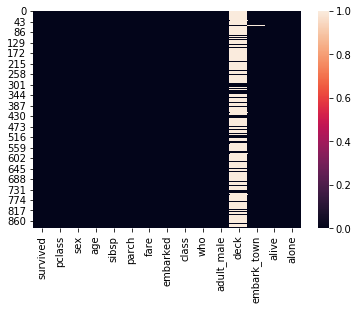

In [19]:
sns.heatmap(titanic.isnull())

In [20]:
titanic.drop(labels=['deck','embark_town', 'alive'],inplace = True, axis= 1)

In [21]:
titanic['fare'] = titanic['fare'].astype('int')
titanic['age'] = titanic['age'].astype('int')
titanic['pclass'] = titanic['pclass'].astype('int')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
survived      891 non-null int64
pclass        891 non-null int32
sex           891 non-null object
age           891 non-null int32
sibsp         891 non-null int64
parch         891 non-null int64
fare          891 non-null int32
embarked      891 non-null object
class         891 non-null category
who           891 non-null object
adult_male    891 non-null bool
alone         891 non-null bool
dtypes: bool(2), category(1), int32(3), int64(3), object(3)
memory usage: 55.0+ KB


In [22]:
genders = {'male' : 0, 'female' : 1}
titanic['sex'] = titanic['sex'].map(genders)


In [23]:
adult_male = {True : 1, False : 0}
titanic['adult_male'] = titanic['adult_male'].map(adult_male)


In [24]:
who = {'man' : 0, 'woman' : 1, 'child' : 2}
titanic['who'] = titanic['who'].map(who)

In [25]:
ports = {'S' : 0, 'C' : 1, 'Q' : 2}
titanic['embarked'] = titanic['embarked'].map(ports)

In [26]:
alone = {True : 1, False : 0}
titanic['alone'] = titanic['alone'].map(alone)


In [29]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,0,22,1,0,7,0,0,1,0
1,1,1,1,38,1,0,71,1,1,0,0
2,1,3,1,26,0,0,7,0,1,0,1
3,1,1,1,35,1,0,53,0,1,0,0
4,0,3,0,35,0,0,8,0,0,1,1


In [28]:
titanic.drop(labels=['class'], inplace= True , axis = 1)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
X = titanic.drop('survived', axis = 1)
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [33]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
6,1,0,54,0,0,51,0,0,1,1
718,3,0,25,0,0,15,2,0,1,1
685,2,0,25,1,2,41,1,0,1,0
73,3,0,26,1,0,14,1,0,1,0
882,3,1,22,0,0,10,0,1,0,1


In [42]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 100000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [43]:
model.score(X_test, y_test)

0.8305084745762712

In [44]:
from sklearn.feature_selection import RFE

In [71]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 500)
rfe = RFE(model, 5, verbose = 1)
rfe = rfe.fit(X,y)


Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [72]:
rfe.support_


array([ True,  True, False,  True, False, False, False,  True,  True,
       False])

In [73]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,3,0,22,1,0,7,0,0,1,0
1,1,1,38,1,0,71,1,1,0,0
2,3,1,26,0,0,7,0,1,0,1
3,1,1,35,1,0,53,0,1,0,0
4,3,0,35,0,0,8,0,0,1,1


In [74]:
XX = X[X.columns[rfe.support_]]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.2, random_state = 8, stratify = y )

X_train.shape



(712, 5)

In [76]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

model.score(X_test, y_test)

0.8491620111731844